In [ ]:
!pip install --upgrade pip
!pip install --upgrade MDAnalysis
!pip install --upgrade MDAnalysisTests

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import MDAnalysis as mda
import MDAnalysisTests as mds
from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory

from MDAnalysis.analysis import rms, align

In [19]:
u = mda.Universe(PSF, DCD)
u.select_atoms('protein')

<AtomGroup with 3341 atoms>

### To calculate RMSF need
1. Calculate average structure as a reference `AverageStructure`
2. Fit the whole trajectory to the reference `AlignTraj`

In [ ]:
# https://docs.mdanalysis.org/1.0.0/_modules/MDAnalysis/analysis/align.html
# Create an average structure and 
# align to the first frame, then average coordinates

average = align.AverageStructure(u, u, select='protein', ref_frame=0).run()
ref = average.universe 

# Align our traj to the reference structure
aligner = align.AlignTraj(u, ref, select='protein', in_memory=True).run()

atoms = u.select_atoms('protein')
R = rms.RMSF(atoms).run()

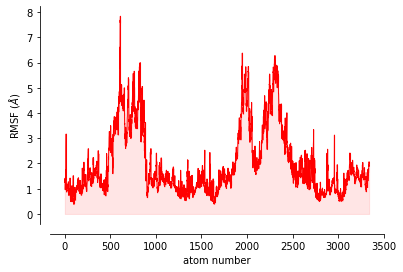

In [21]:
ax = plt.subplot(111)
ax.plot(atoms.atoms.ids, R.rmsf, 'r-', linewidth=1)
ax.fill_between(atoms.atoms.ids, R.rmsf, color="red", alpha=0.1)
sns.despine(ax=ax, offset=10)
ax.set_xlabel("atom number")
ax.set_ylabel(r"RMSF ($\AA$)");